# <font color='#FFE15D'>**Titanic Survival Rate**</font>

## 🔸 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  missingno as msno
import seaborn as sns

## 🔸 Load Dataset

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


#### Getting information about the dataset

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 🔸 Preprocessing

### Handling Missing Values

#### Removing irrelevant columns

In [6]:
df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

#### Check to see if there are any missing values

<Axes: >

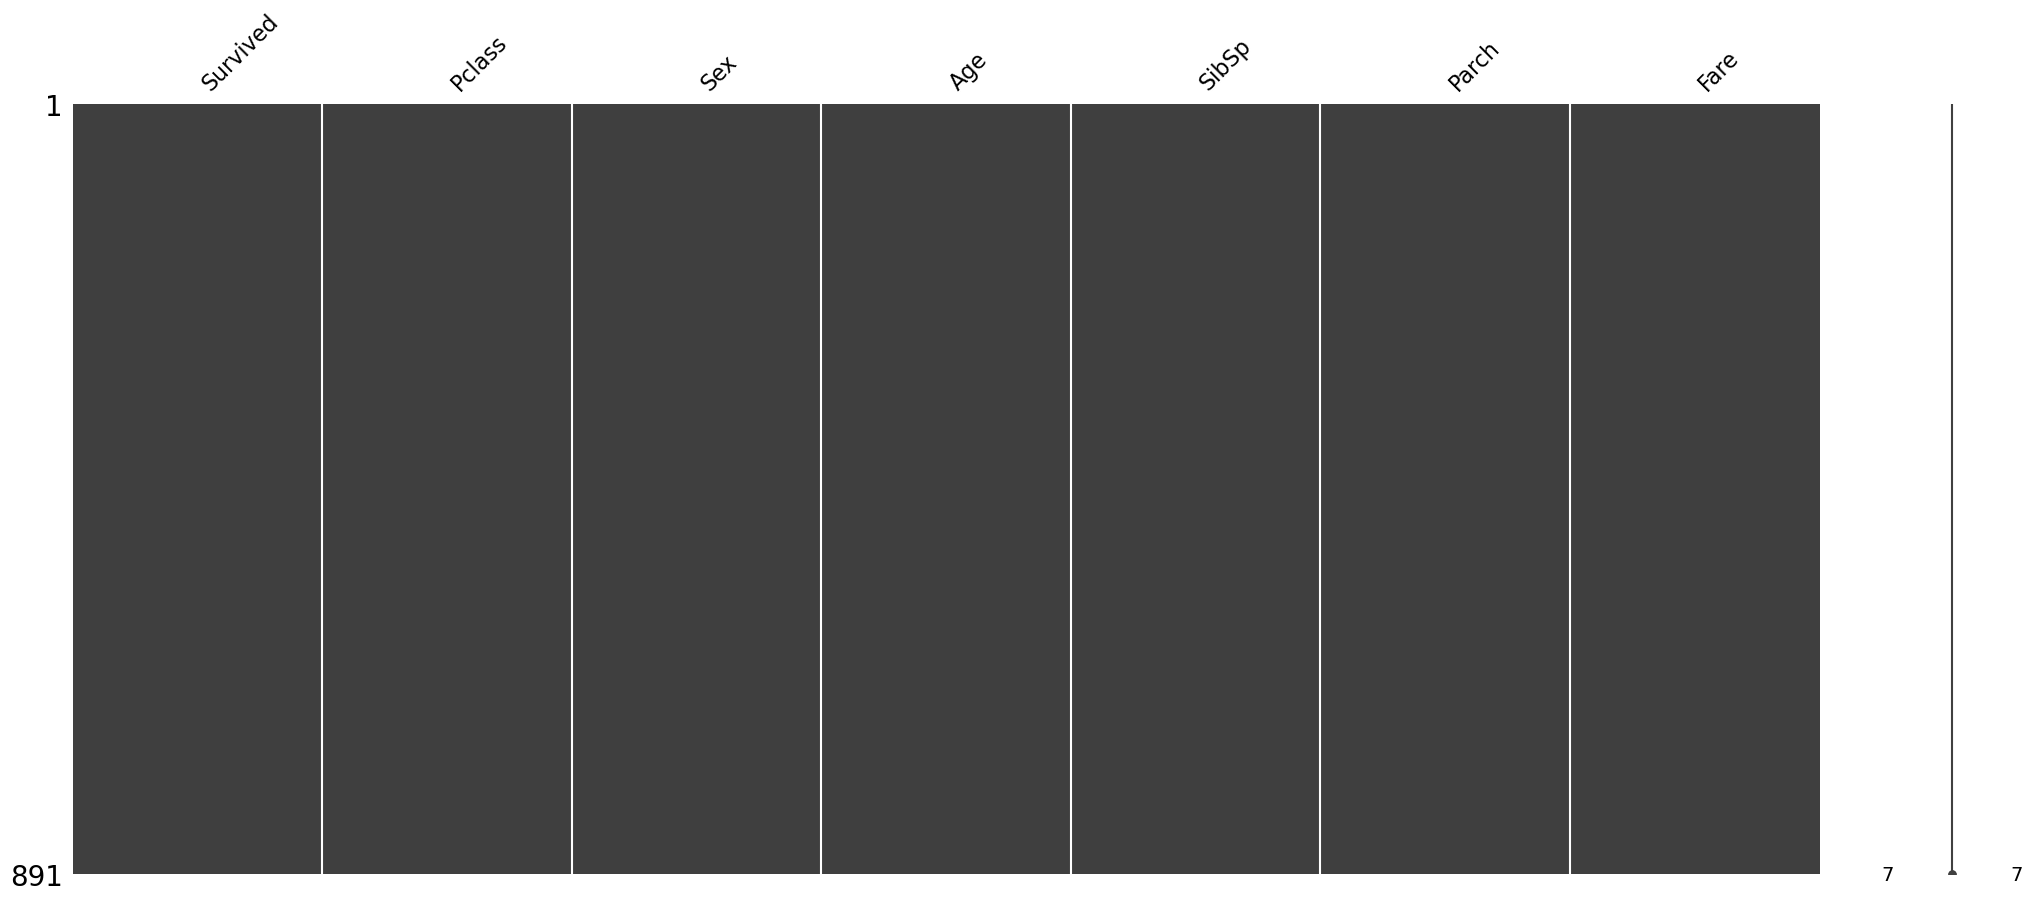

In [7]:
msno.matrix(df)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

####  Binning the ages into categories. The pd.cut function is used to segregate array 
elements into different bins. Each bin is a range of ages, and they are labeled
as ‘Infant’, ‘Teen’, ‘20s’, ‘30s’, ‘40s’, ‘50s’, and ‘Elder’. 
This can be useful for later analyzing this feature

In [9]:
df['Age'] = df['Age'].astype(int)

In [10]:
df['Age'] = pd.cut(x = df['Age'], bins = [0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

### Encoding Categorical Features

#### Encoding sex feature using map function

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       884 non-null    category
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 43.1+ KB


In [12]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

## **🔸 Exploratory Data Analysis (EDA)**

### Single Variable Analysis

#### Plotting histogram for each feature

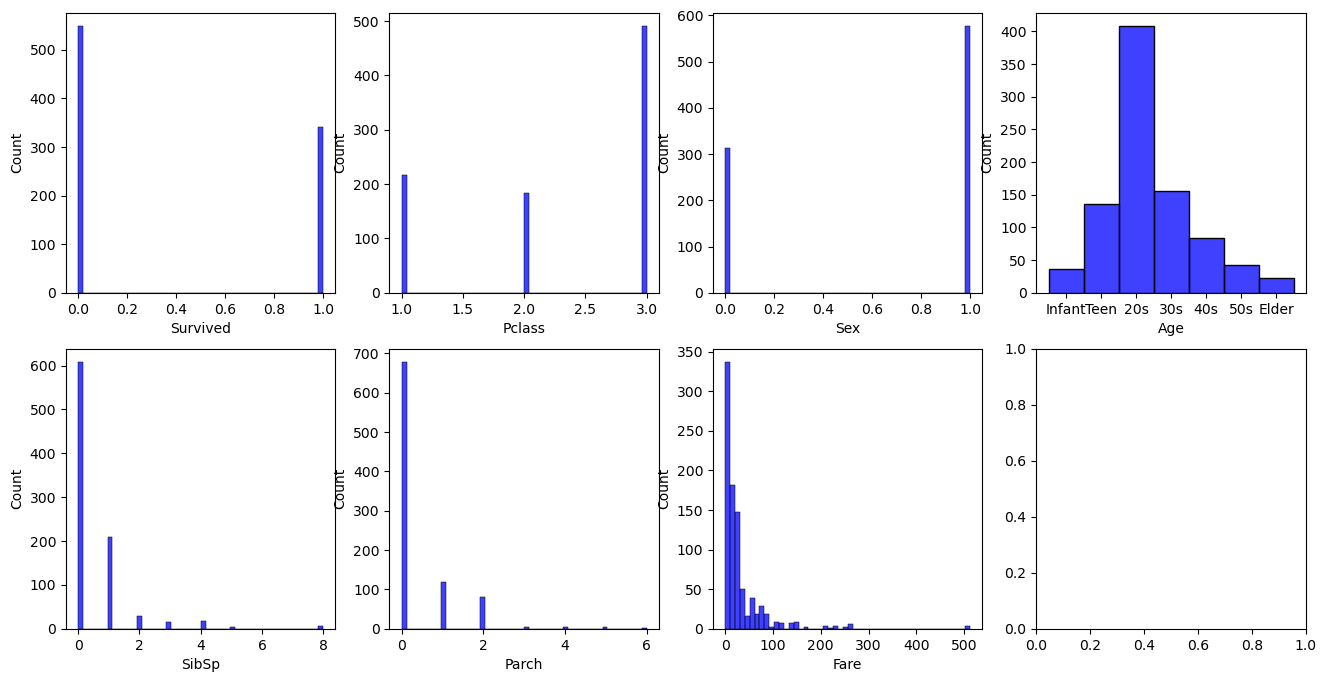

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes_flat[i]    
    sns.histplot(df[col], bins=50, color='b', ax=ax)

#### Plotting count plot for each feature

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (16, 8))
axes_flat = axes.flatten()
columns_except_fare = [col for col in df.columns if col != 'Fare']

for i, col in enumerate(columns_except_fare):
    ax = axes_flat[i] 
    sns.countplot(x = df[col], data = df, ax = ax)

#### Plotting KDE plot for 'Fare' feature

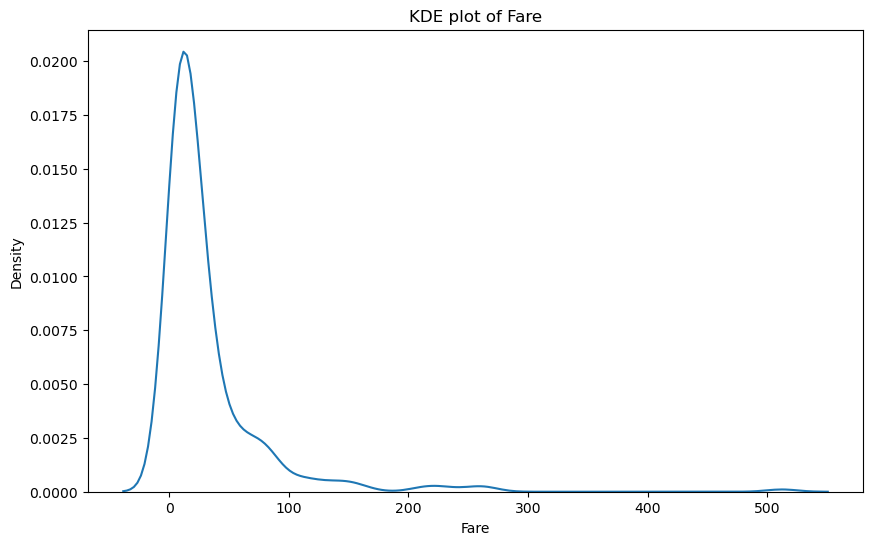

In [16]:
plt.figure(figsize = (10,6))
sns.kdeplot(data = df, x = 'Fare')
plt.title('KDE plot of Fare')
plt.show()

### Two Variable Analysis

- Survived: This is the target variable we are trying to predict (0 = No; 1 = Yes). The correlation of other variables with 'Survived' gives an idea of their impact on survival rate. For instance, 'Sex' and 'Survived' seem to have a strong positive correlation, indicating that the gender of the passengers could have influenced their survival chances.
- Pclass (Passenger Class): This is a proxy for socio-economic status (1 = 1st class (Upper); 2 = 2nd class (Middle); 3 = 3rd class (Lower)). It has a negative correlation with 'Survived', suggesting that lower class passengers were less likely to survive.
- Sex: This is a binary variable (0 = Male; 1 = Female). It has a strong positive correlation with 'Survived', indicating that males had a higher survival rate than females.
- Age: This is a continuous variable indicating the age of the passenger. The correlation between 'Age' and 'Survived' is not very strong, suggesting that age alone might not be a good predictor of survival.
- SibSp: This variable indicates the number of siblings/spouses aboard. It doesn't have a strong correlation with 'Survived', suggesting that the number of siblings/spouses aboard might not have a significant impact on survival.
- Parch: This variable indicates the number of parents/children aboard. Like 'SibSp', 'Parch' also doesn't have a strong correlation with 'Survived'.
- Fare: This is a continuous variable representing the passenger fare. It has a positive correlation with 'Survived', suggesting that passengers who paid higher fares were more likely to survive, possibly because they were in higher passenger classes.

C:\Users\niloo\AppData\Local\Temp\ipykernel_9736\92660599.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

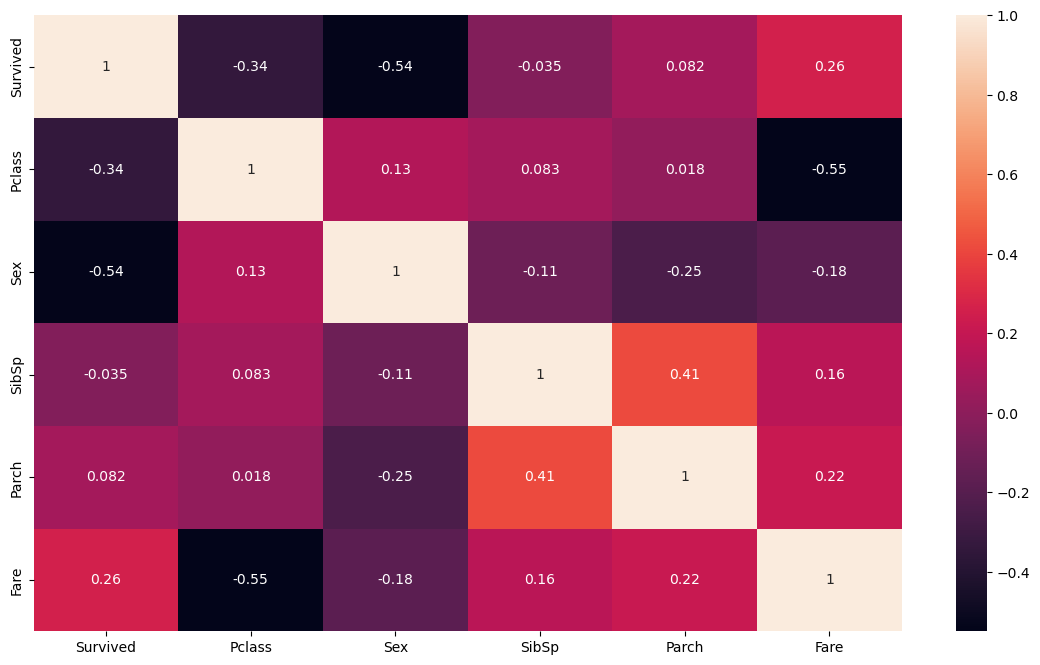

In [18]:
plt.figure(figsize=(14, 8))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [19]:
corr[['Survived']].abs().sort_values(by='Survived')

,Survived
SibSp,0.035322
Parch,0.081629
Fare,0.257307
Pclass,0.338481
Sex,0.543351
Survived,1.000000


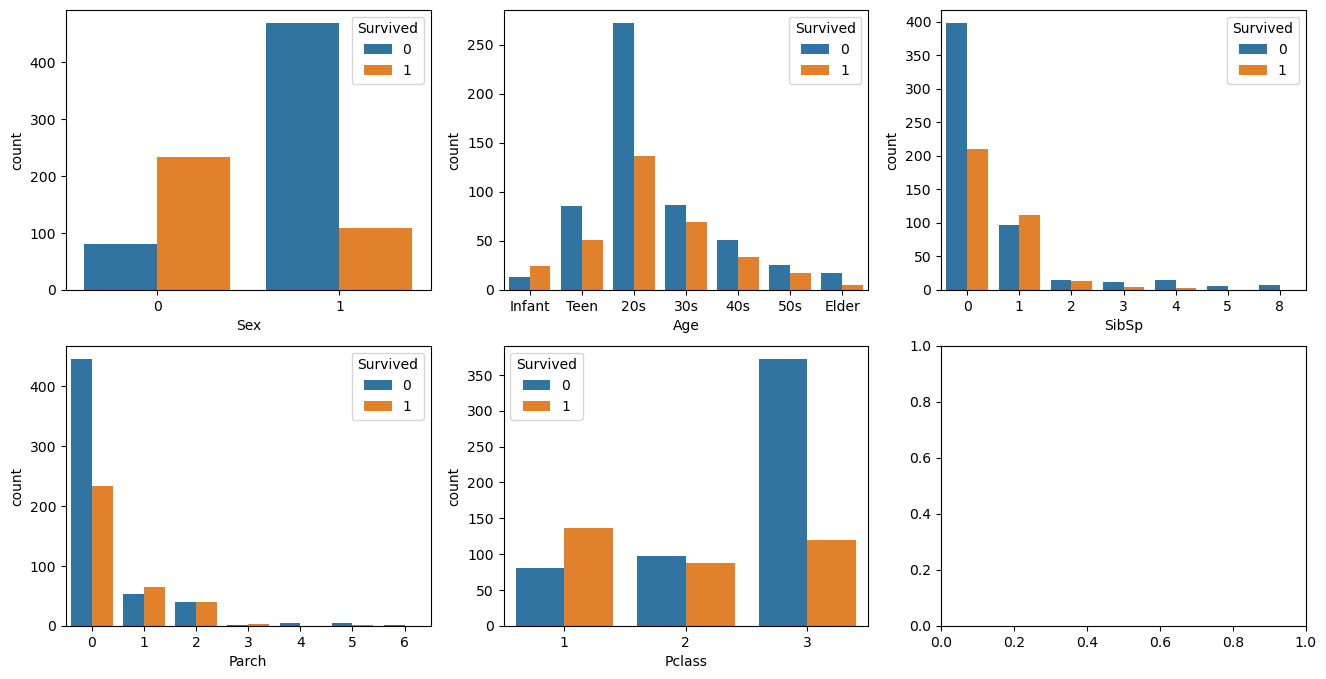

In [20]:
cols = ['Sex', 'Age', 'SibSp', 'Parch', 'Pclass']

fig, axes = plt.subplots(2, 3, figsize = (16, 8))
axes_flat = axes.flatten()

for i, col in enumerate(cols):
    ax = axes_flat[i] 
    sns.countplot(x = col, data = df, hue = 'Survived', ax = ax)

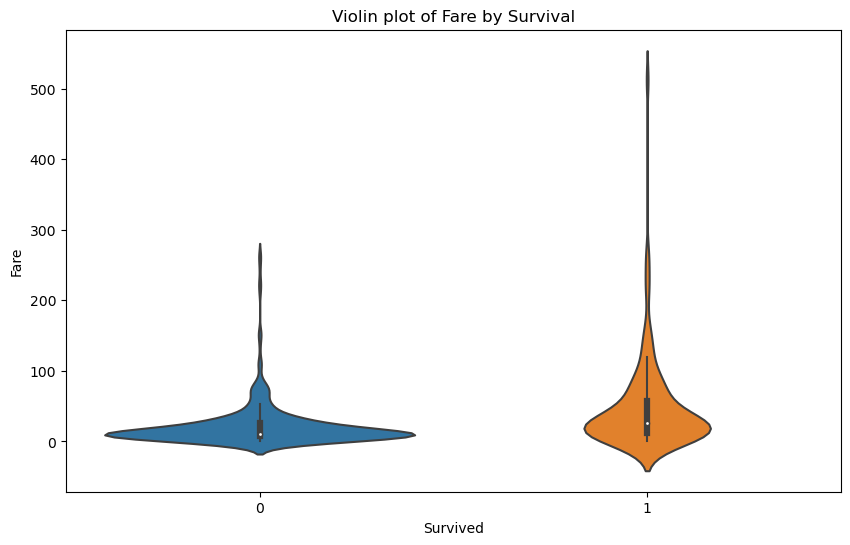

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'Survived', y = 'Fare', data = df)
plt.title('Violin plot of Fare by Survival')
plt.show()

#### Further preprcosseing the 'Age' feature

In [22]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}

df['Age'] = df['Age'].map(age_mapping)

In [23]:
df.dropna(subset=['Age'], axis= 0, inplace = True)

#### Splitting the df into X and y variables

In [24]:
y = df['Survived']
x = df.drop(columns=['Survived'])

## **🔸 Model Training (ID3 from Scratch)**

### Utilies

In [25]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

In [26]:
def information_gain(data, feature, target):
    
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])
    
    return entropy_parent - entropy_child

In [27]:
target = 'Survived'
columns_except_target = [col for col in df.columns if col != target]
for col in columns_except_target: 
    ig = information_gain(df, col, target)
    print(f'IG of {col} : {ig}')

IG of Pclass : 0.09858485512428761
IG of Sex : 0.24224166039520068
IG of Age : 0.0067630583143030165
IG of SibSp : 0.023079820377931992
IG of Parch : 0.017940673237646476
IG of Fare : 0.43126033782434336


#### In a decision tree, the attribute with the highest Information Gain (IG) is typically selected as the root node. In this case, the attribute ‘Fare’ has the highest IG, so it should be selected as the root node. The goal of using IG is to decide which feature splits the data best. We’re looking for the feature that best separates the survivors from the non-survivors. In this case, it appears ‘Fare’ does this the best.

In [28]:
class Node:
    
    def __init__(self, feature = None, label = None):
        self.feature = feature
        self.label = label
        self.children = {}
        
    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature = "{self.feature}", children = {self.children})'
        else:
            return f'LeafNode(label = "{self.label}")'
        
Node(feature='Fare')        

DecisionNode(feature = "Fare", children = {})

In [29]:
def make_tree(data, target):
    
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label = data[target].iloc[0])
    
    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])
    
    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]
    
    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]
    
    # make a node
    node = Node(feature=best_feature)
    
    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        
        node.children[value] = make_tree(subset, target)
    
    return node

In [30]:
tree = make_tree(df, 'Survived')
tree

DecisionNode(feature = "Fare", children = {75.25: LeafNode(label = "1"), 79.2: DecisionNode(feature = "Age", children = {5.0: LeafNode(label = "1"), 4.0: LeafNode(label = "0"), 2.0: DecisionNode(feature = "Sex", children = {0: LeafNode(label = "1"), 1: LeafNode(label = "0")})}), 39.0: DecisionNode(feature = "Sex", children = {1: LeafNode(label = "0"), 0: LeafNode(label = "1")}), 26.55: DecisionNode(feature = "Age", children = {5.0: DecisionNode(feature = "Sex", children = {1: DecisionNode(feature = "Pclass", children = {1: DecisionNode(feature = "SibSp", children = {0: DecisionNode(feature = "Parch", children = {0: LeafNode(label = "0")})})}), 0: LeafNode(label = "1")}), 4.0: DecisionNode(feature = "Pclass", children = {1: DecisionNode(feature = "Sex", children = {1: DecisionNode(feature = "SibSp", children = {0: DecisionNode(feature = "Parch", children = {0: LeafNode(label = "1")})})})}), 3.0: LeafNode(label = "1"), 2.0: DecisionNode(feature = "Pclass", children = {1: DecisionNode(fea

In [31]:
tree.feature

'Fare'

In [32]:
def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = str(node.feature) if node.feature is not None else str(child)+str(node.label)
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

## **🔸 Decision Tree (sklearn)**

In [33]:
from sklearn import tree

In [34]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42, ccp_alpha=0.001)

In [35]:
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=42)

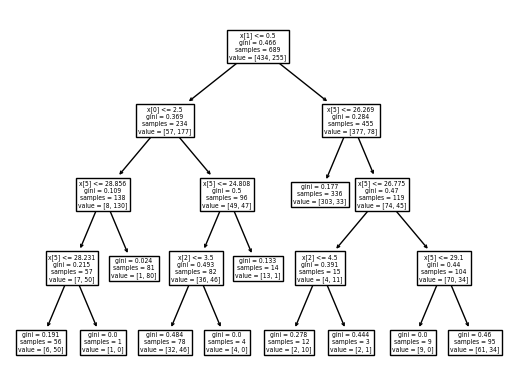

In [36]:
tree.plot_tree(clf);

In [37]:
clf.score(x, y)

0.8403483309143687

## **🔸 Evaluation**

In [38]:
df_test = pd.read_csv('titanic_test.csv')
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔸 Preprocessing

In [39]:
df_test = df_test.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis = 1)

In [40]:
df_test['Age'] = df_test['Age'].replace(np.nan, df_test['Age'].median(axis = 0))

In [41]:
df_test['Age'] = df_test['Age'].astype(int)

In [42]:
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

In [43]:
df_test['Age'] = pd.cut(x = df_test['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = [0,1,2,3,4,5,6])

In [44]:
df_test.dropna(subset=['Age'], axis= 0, inplace = True)

#### Splitting the df into X and y variables

In [45]:
x = df_test.drop(columns = ['Survived'])
y = df_test['Survived']

#### Model evaluation on test df

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
y_pred = clf.predict(x)

In [48]:
accuracy_score(y, y_pred)

0.8257918552036199

#### Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

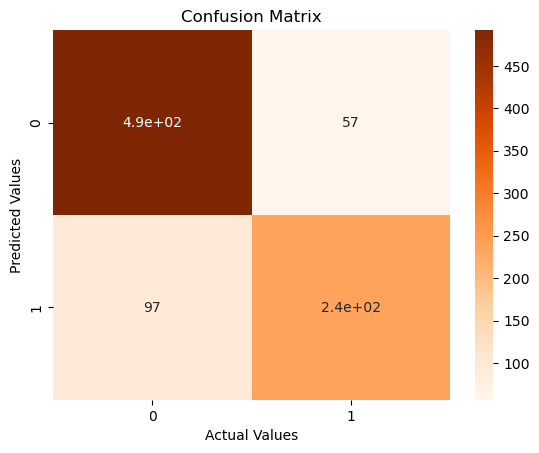

In [50]:
sns.heatmap(confusion_matrix(y, y_pred), annot = True, cmap = 'Oranges')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix')